In [1]:
########################################################################
# File       : Read_and_Display_Images_using_Widgets_and_Napari.ipynb
# Version    : 0.1
# Author     : czsrh
# Date       : 12.11.2019
# Insitution : Carl Zeiss Microscopy GmbH
#
# Disclaimer: Just for testing - Use at your own risk.
# Feedback or Improvements are welcome.
########################################################################

***Import Libraries to run this notebook***

* [PyPi - czifile](https://pypi.org/project/czifile/)

Thanks to Christoph Gohlke. For details and the source code please see [czifile.py](https://www.lfd.uci.edu/~gohlke/code/czifile.py.html)

* [PyPi - apeer-ometiff-library](https://pypi.org/project/apeer-ometiff-library/)

It uses parts of python-bioformats library: [PyPi - python-bioformats](https://pypi.org/project/python-bioformats/).

More information on the source code can be found on the APEER GitHub project page: [GitHub - apeer-ometiff-library](https://github.com/apeer-micro/apeer-ometiff-library)

* [PyPi - napari](https://pypi.org/project/napari/)

Very new, fast and cool multi-dimensional array viewer. For more details see the prject page [GitHub - napari](https://github.com/napari/napari)

* imagefileutils

This is collection of of usefule function to read CZI and OME-TFF image files. This tool uses many of the modules mentioned above

***

Another important modules

* [PyPi - xmltodict](https://pypi.org/project/xmltodict/)

This is turns an XML, e.g. the OME-XML or CZI metadata into an "easy-to-use" python dictionary.

In [2]:
# import the libraries mentioned above
from apeer_ometiff_library import io #, processing, omexmlClass
import czifile as zis
import xmltodict
import os
import numpy as np
import ipywidgets as widgets
import napari
import imgfileutils as imf
from lxml import etree as ET
from IPython.display import display, HTML

In [3]:
# define your testfiles here

#testfolder = r'/datadisk1/tuxedo/Github/ipy_notebooks/Read_OMETIFF_CZI/testdata'
testfolder = r'testdata'


imgdict = {1: os.path.join(testfolder, r'CellDivision_T=10_Z=15_CH=2_DCV_small_green.ome.tiff'),
           2: os.path.join(testfolder, r'CellDivision_T=10_Z=15_CH=2_DCV_small_red.ome.tiff'),
           3: os.path.join(testfolder, r'CellDivision_T=10_Z=15_CH=2_DCV_small.ome.tiff'),
           4: os.path.join(testfolder, r'CellDivision_T=10_Z=15_CH=2_DCV_small_green.czi'),
           5: os.path.join(testfolder, r'CellDivision_T=10_Z=15_CH=2_DCV_small_red.czi'),
           6: os.path.join(testfolder, r'CellDivision_T=10_Z=15_CH=2_DCV_small.czi')
}

filename = imgdict[6]

In [4]:
# To read the CZI metadata one can use the czifile functionality

# get czi object using the filename
czi = zis.CziFile(filename)

# get the metadata and close the czi file object
mdczi = czi.metadata()
czi.close()

# parse the XML into a dictionary
metadatadict_czi = xmltodict.parse(mdczi)

In [5]:
# Sometime it can be very usefule to save the CZI metadate as an actual XML file.
# This can be done quite easily by converting the metadata string into an XML tree.
# This tree object can be directly as an XML file

# define the new filename for the XML to be created later
xmlfile = filename.replace('.czi', '_CZI_MetaData.xml')

# get the element tree
tree = ET.ElementTree(ET.fromstring(mdczi))

# write xml to disk
tree.write(xmlfile, encoding='utf-8', method='xml')

print('Write special CZI XML metainformation for: ', xmlfile)

Write special CZI XML metainformation for:  testdata\CellDivision_T=10_Z=15_CH=2_DCV_small_CZI_MetaData.xml


In [6]:
# or much shorter
xmlczi = imf.writexml_czi(filename)
print(xmlczi)

testdata\CellDivision_T=10_Z=15_CH=2_DCV_small_CZI_MetaData.xml


### Remark

As one can clearly see there are a lot of metadata not all of them are needed for every workflow.

In [7]:
# read metadata and array differently for OME-TIFF or CZI data
if filename.lower().endswith('.ome.tiff') or filename.lower().endswith('.ome.tif'):
    
    # Return value is an array of order (T, Z, C, X, Y)
    (array, omexml) = io.read_ometiff(filename)
    metadata, add_metadata = imf.get_metadata(filename, series=0)
    
if filename.lower().endswith('.czi'):

    # get the array and the metadata
    array, metadata, add_metadata = imf.get_array_czi(filename, return_addmd=False)
    
### show complete metadata

# convert metadata dictionary to a pandas dataframe
mdframe = imf.md2dataframe(metadata)

# and display it nicely as a HTML inside the jupyter notebook
display(HTML(mdframe.to_html()))

C:\ProgramData\Anaconda3\envs\imageanalysis\lib\site-packages\aicsimageio\transforms.py:178: UserWarning: Data has dimension B with depth 1, assuming B=0 is the desired value, if not the case specify B=x where x is an integer, list, tuple, range, or slice.
  f"Data has dimension {dim} with depth {data.shape[dim_index]}, "


Trying to extract Scene and Well information if existing ...
No valid Scene or Well information found: 'S'


,Parameter,Value
0,Directory,testdata
1,Filename,CellDivision_T=10_Z=15_CH=2_DCV_small.czi
2,Extension,czi
3,ImageType,czi
4,AcqDate,2016-02-12T09:41:02.4915604Z
5,TotalSeries,None
6,SizeX,256
7,SizeY,256
8,SizeZ,15
9,SizeC,2


In [8]:
# outout the shape of the returned numpy array

# shape of numpy array
print('Array Shape: ', array.shape)

# dimension order from metadata
print('Dimension Order (BioFormats) : ', metadata['DimOrder BF Array'])

# shape and dimension entry from CZI file as returned by czifile.py
print('CZI Array Shape : ', metadata['Shape_czifile'])
print('CZI Dimension Entry : ', metadata['Axes_czifile'])

Array Shape:  (1, 10, 2, 15, 256, 256)
Dimension Order (BioFormats) :  None
CZI Array Shape :  (1, 10, 2, 15, 256, 256, 1)
CZI Dimension Entry :  BTCZYX


In [9]:
# show dimensions and scaling
print('SizeT : ', metadata['SizeT'])
print('SizeZ : ', metadata['SizeZ'])
print('SizeC : ', metadata['SizeC'])
print('SizeX : ', metadata['SizeX'])
print('SizeY : ', metadata['SizeY'])
print('XScale: ', metadata['XScale'])
print('YScale: ', metadata['YScale'])
print('ZScale: ', metadata['ZScale'])

SizeT :  10
SizeZ :  15
SizeC :  2
SizeX :  256
SizeY :  256
XScale:  0.09057667415221031
YScale:  0.09057667415221031
ZScale:  0.32


In [10]:
# show all the metadata
for key, value in metadata.items():
    # print all key-value pairs for the dictionary
    print(key, ' : ', value)

Directory  :  testdata
Filename  :  CellDivision_T=10_Z=15_CH=2_DCV_small.czi
Extension  :  czi
ImageType  :  czi
AcqDate  :  2016-02-12T09:41:02.4915604Z
TotalSeries  :  None
SizeX  :  256
SizeY  :  256
SizeZ  :  15
SizeC  :  2
SizeT  :  10
SizeS  :  1
SizeB  :  1
SizeM  :  1
Sizes BF  :  None
DimOrder BF  :  None
DimOrder BF Array  :  None
czi_isRGB  :  None
czi_isMosaic  :  False
ObjNA  :  1.2
ObjMag  :  50.0
ObjID  :  Objective:1
ObjName  :  Plan-Apochromat 50x/1.2
ObjImmersion  :  Water
XScale  :  0.09057667415221031
YScale  :  0.09057667415221031
ZScale  :  0.32
XScaleUnit  :  µm
YScaleUnit  :  µm
ZScaleUnit  :  µm
DetectorModel  :  ['Axiocam506m']
DetectorName  :  ['Axiocam 506']
DetectorID  :  ['Detector:Axiocam 506']
DetectorType  :  [None]
InstrumentID  :  []
Channels  :  ['AF555', 'AF488']
ChannelNames  :  ['LED555', 'LED470']
ChannelColors  :  ['#FFFF7E00', '#FF00FF33']
ImageIDs  :  []
NumPy.dtype  :  uint16
Axes_czifile  :  BTCZYX
Shape_czifile  :  (1, 10, 2, 15, 256, 256,

0 29801


Output()

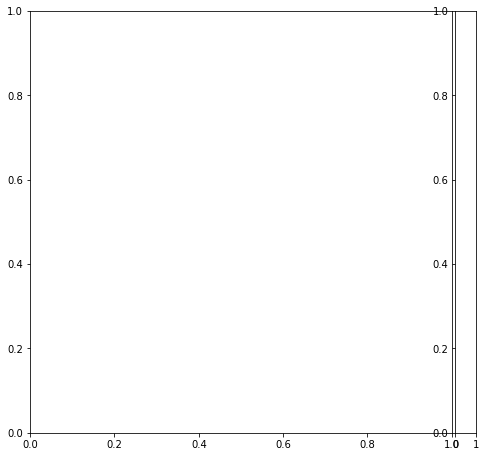

In [11]:
# display data using ipy widgets
if metadata['Extension'] == 'ome.tiff':
    ui, out = imf.create_ipyviewer_ome_tiff(array, metadata)
if metadata['Extension'] == 'czi':
    ui, out = imf.create_ipyviewer_czi(array, metadata)

display(ui, out)

In [ ]:
# try to configure napari automatiaclly based on metadata
imf.show_napari(array, metadata)

In [ ]:
# configure napari viewer manually - check array shape and dimensions order carefully 
    
# get the scalefactors
scalefactors = imf.get_scalefactor(metadata)
print(scalefactors)

array = np.squeeze(array, axis=(0, 1))

viewer = napari.Viewer()
# add every channel as a single layer
for ch in range(metadata['SizeC']):
    chname = metadata['Channels'][ch]
    viewer.add_image(array[ch, :, :, :], name=chname, scale=(1, scalefactors['zx'], 1, 1))

jupyter nbconvert MIAP_Read_and_Display_Images.ipynb --to slides --post serve